# Introduction

Mutluluk, bir √ºlkenin genel refah seviyesini belirleyen √∂nemli g√∂stergelerden biridir. Ekonomik, sosyal ve psikolojik fakt√∂rler, bireylerin mutluluk seviyelerini doƒürudan etkiler. D√ºnya Mutluluk Raporu 2024, farklƒ± √ºlkelerdeki mutluluk seviyelerini analiz ederek, bu mutluluƒüu belirleyen temel fakt√∂rleri ortaya koymaktadƒ±r.

Bu veri setinde, √ºlkelerin mutluluk d√ºzeylerini etkileyen ki≈üi ba≈üƒ±na d√º≈üen GSYƒ∞H, sosyal destek, ya≈üam s√ºresi, √∂zg√ºrl√ºk, c√∂mertlik ve yolsuzluk algƒ±sƒ± gibi g√∂stergeler yer almaktadƒ±r.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [missing values](#2)
1. [Variable Description](#3)
    * [Variable Analysis](#4)
    * [Relationship Between Features](#5)
1. [Happiness Score by Region](#6)
1. [Life Ladder Comparison by Contries and Years](#7)

In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


<a id = "1"></a><br>
# Load and Check Data

In [180]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv',encoding= "ISO-8859-1")
df2 = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv',encoding= "ISO-8859-1")

In [99]:
df.head()  # ƒ∞lk 5 satƒ±rƒ± g√∂sterir

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

In [215]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2363.000000     2363.000000   
mean   2014.763860     5.483566            9.397139        0.809705   
std       5.059436     1.125522            1.151189        0.121002   
min    2005.000000     1.281000            5.527000        0.228000   
25%    2011.000000     4.647000            8.504000        0.744000   
50%    2015.000000     5.449000            9.503000        0.835667   
75%    2019.000000     6.323500           10.390000        0.904000   
max    2023.000000     8.019000           11.676000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2363.000000                   2363.000000   
mean                          63.424639                      0.749765   
std                            6.808815                      0.139053   
min                            6.720000                      0.228000   
25%                           59.280000                      0.659500   
50%                           65.100000                      0.770000   
75%                           68.567500                      0.861000   
max                           74.600000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  2363.000000                2363.000000      2363.000000   
mean      0.001603                   0.744338         0.651691   
std       0.159973                   0.181827         0.106013   
min      -0.340000                   0.035000         0.179000   
25%      -0.109000                   0.688000         0.572000   
50%      -0.018000                   0.797000         0.663000   
75%       0.095000                   0.865000         0.737000   
max       0.700000                   0.983000         0.884000   

       Negative affect  
count      2363.000000  
mean          0.273166  
std           0.086998  
min           0.083000  
25%           0.209000  
50%           0.262000  
75%           0.326000  
max           0.705000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


<a id = "2"></a><br>
### missing values

In [218]:

missing_values = df2.isnull().sum()

missing_values = missing_values[missing_values > 0]

print("Eksik Veriler:\n", missing_values)


Eksik Veriler:
 Series([], dtype: int64)


In [217]:

missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

print("Eksik Veriler:\n", missing_values)


Eksik Veriler:
 Series([], dtype: int64)


In [216]:
from sklearn.impute import KNNImputer

# 1Ô∏è‚É£ Sayƒ±sal s√ºtunlarƒ± se√ßelim
num_cols_df = df.select_dtypes(include=['float64', 'int64']).columns
num_cols_df2 = df2.select_dtypes(include=['float64', 'int64']).columns

# 2Ô∏è‚É£ Sadece sayƒ±sal s√ºtunlarƒ± i√ßeren DataFrame'leri olu≈ütur
df_numeric = df[num_cols_df]
df2_numeric = df2[num_cols_df2]

# 3Ô∏è‚É£ KNN ƒ∞mputer Modelini Tanƒ±mla (k = 3)
imputer = KNNImputer(n_neighbors=3)

# 4Ô∏è‚É£ KNN Modelini Kullanarak Eksik Deƒüerleri Doldur
df_filled = imputer.fit_transform(df_numeric)
df2_filled = imputer.fit_transform(df2_numeric)

# 5Ô∏è‚É£ Eksik verileri doldurulmu≈ü olan verileri geri atayalƒ±m
df[num_cols_df] = df_filled
df2[num_cols_df2] = df2_filled

# Eksik veri kontrol√º sonrasƒ±
print("\nEksik Veri Sayƒ±larƒ± (df Sonrasƒ±):\n", df.isnull().sum())
print("\nEksik Veri Sayƒ±larƒ± (df2 Sonrasƒ±):\n", df2.isnull().sum())



Eksik Veri Sayƒ±larƒ± (df Sonrasƒ±):
 Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

Eksik Veri Sayƒ±larƒ± (df2 Sonrasƒ±):
 Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64


<a id = "3"></a><br>
# Variable Description

1. Country name : √úlkenin adƒ±.
1. year : Verinin ait olduƒüu yƒ±l.
1. Life Ladder : √úlkedeki ortalama mutluluk skoru (0-10 arasƒ±nda).
1. Log GDP per capita : Ki≈üi ba≈üƒ±na d√º≈üen GSYƒ∞Hnƒ±n (Gayri Safi Yurt ƒ∞√ßi Hasƒ±la) logaritmik deƒüeri.
1. Social support : ƒ∞nsanlarƒ±n zor zamanlarƒ±nda aileleri veya arkada≈ülarƒ±ndan destek alƒ±p almadƒ±ƒüƒ±nƒ± g√∂steren skor (0-1 arasƒ±nda).
1. Healthy life expectancy at birth : Doƒüumda beklenen saƒülƒ±klƒ± ya≈üam s√ºresi (yƒ±l olarak).
1. Freedom to make life choices : ƒ∞nsanlarƒ±n hayatlarƒ±yla ilgili karar verme √∂zg√ºrl√ºƒü√º hissi (0-1 arasƒ±nda).
1. Generosity : Toplumdaki c√∂mertlik d√ºzeyi (baƒüƒ±≈ü yapma ve yardƒ±mla≈üma eƒüilimi).
1. Perceptions of corruption : ƒ∞nsanlarƒ±n √ºlkelerindeki h√ºk√ºmette ve i≈ü d√ºnyasƒ±nda yolsuzluk olup olmadƒ±ƒüƒ±na dair algƒ±sƒ± (0-1 arasƒ±nda).
1. Positive affect : ƒ∞nsanlarƒ±n g√ºnl√ºk olarak ne kadar olumlu duygular hissettiƒüi (mutluluk, g√ºl√ºmseme vb.).
1. Negative affect : ƒ∞nsanlarƒ±n g√ºnl√ºk olarak ne kadar olumsuz duygular hissettiƒüi (stres, √ºz√ºnt√º, √∂fke vb.).

<a id = "4"></a><br>
# Variable Analysis

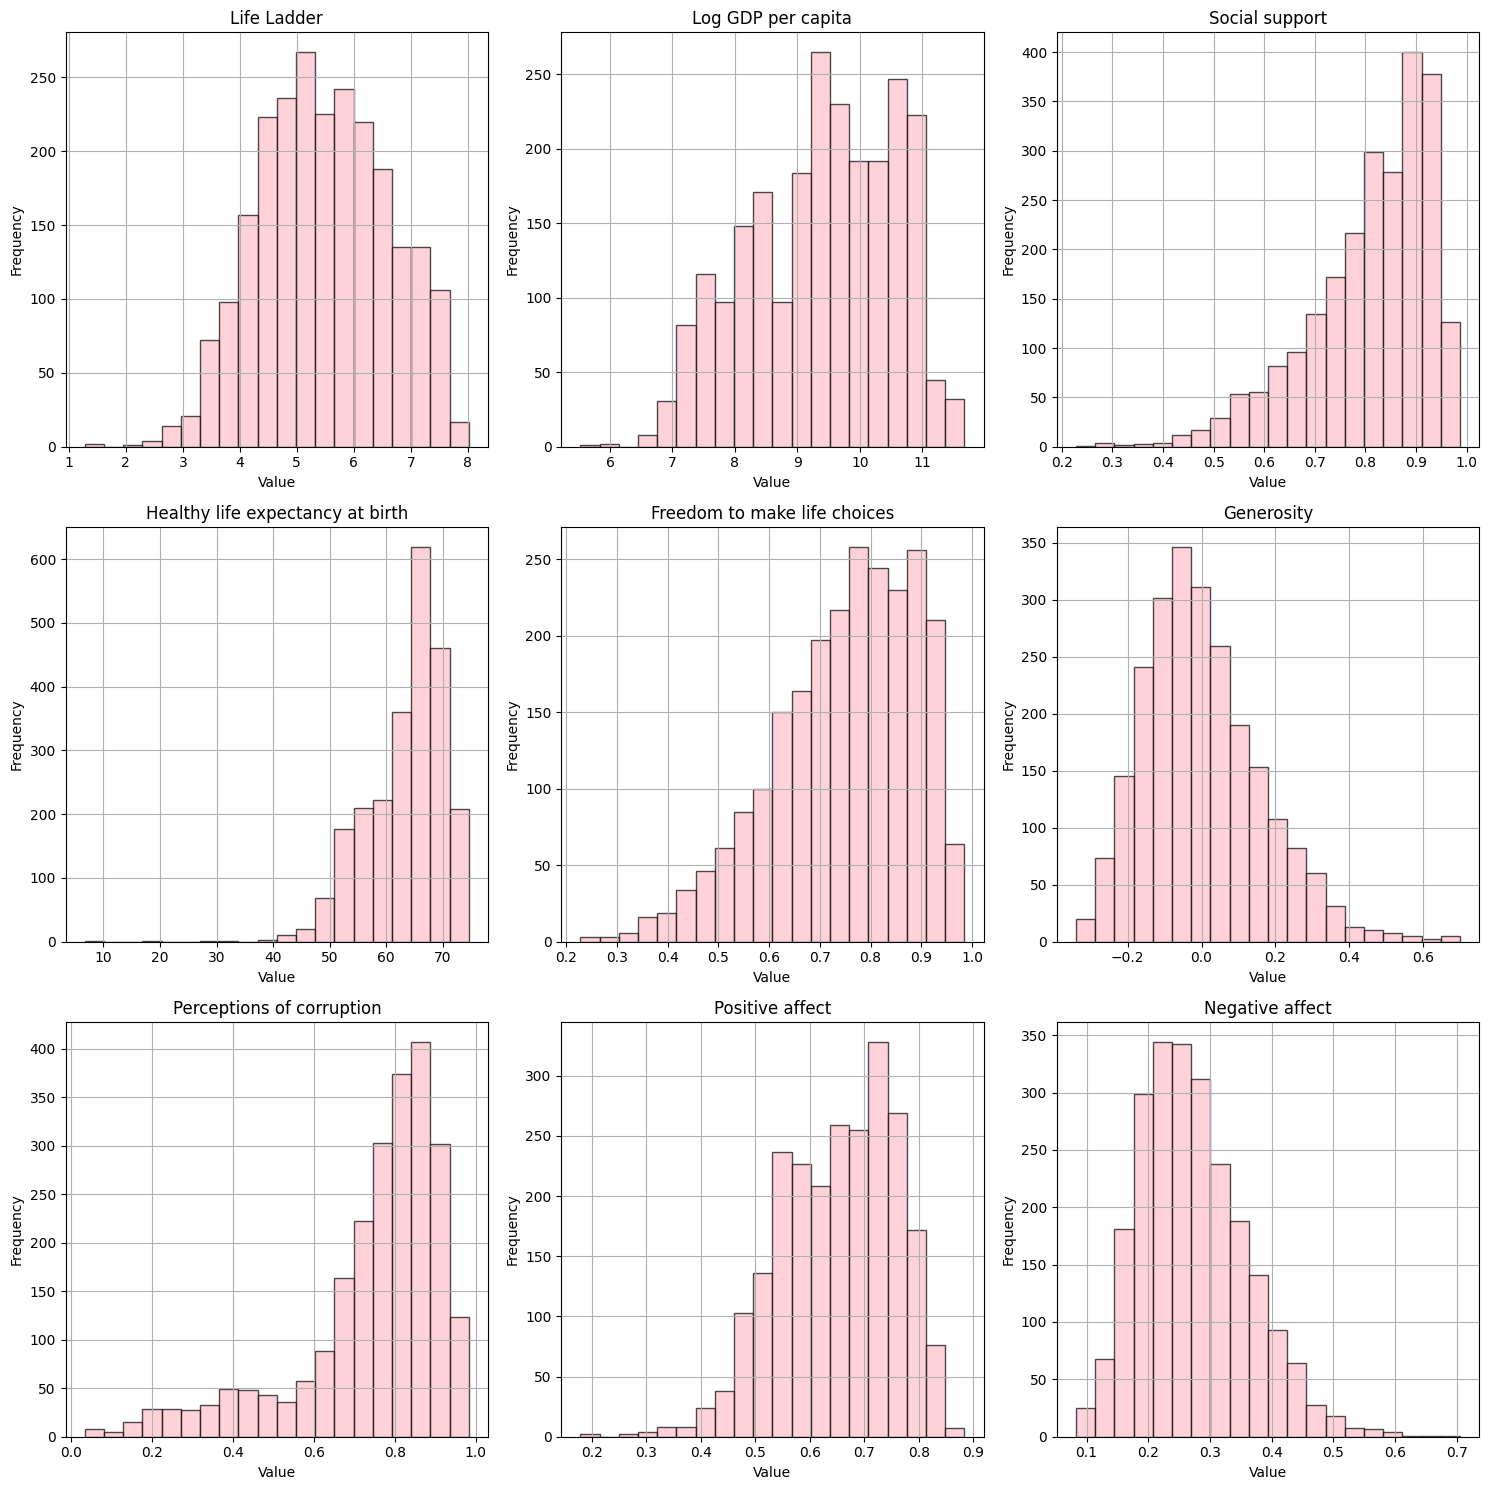

In [209]:

num_vars = ["Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
            "Freedom to make life choices", "Generosity", "Perceptions of corruption", 
            "Positive affect", "Negative affect"]

num_cols = 3
num_rows = (len(num_vars) // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))


for i, var in enumerate(num_vars):
    row = i // num_cols
    col = i % num_cols
    df[var].hist(ax=axes[row, col], bins=20, color='pink', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")


plt.tight_layout()
plt.show()

### burada her bir deƒüi≈ükenin deƒüerlerini, sƒ±klƒ±ƒüƒ±nƒ± ve outlier deƒüerleri g√∂rebiliyoruz

<a id = "5"></a><br>
# Relationship Between Features

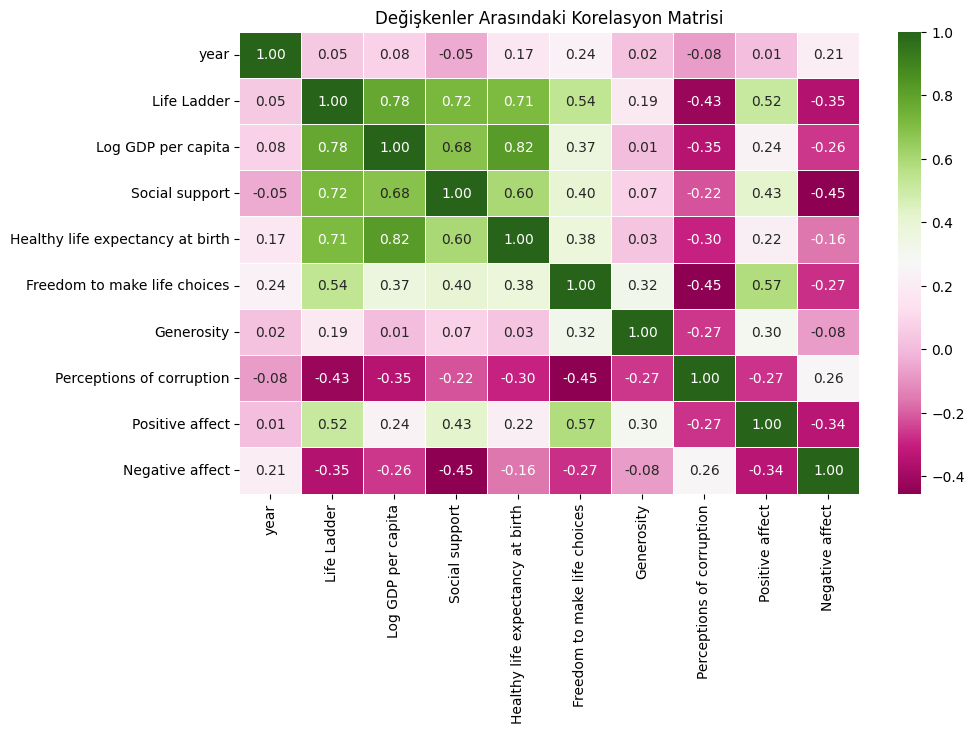

In [210]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            continue
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="PiYG", fmt=".2f", linewidths=0.5)
plt.title("Deƒüi≈ükenler Arasƒ±ndaki Korelasyon Matrisi")
plt.show()

### burada her bir deƒüi≈ükenin birbiriyle ili≈ükisini g√∂rebiliyoruz. 1e yakƒ±n olmasƒ± √ßok ili≈ükili, 0a yakƒ±n olmasƒ± az ili≈ükili, negatif olmasƒ± negatif ili≈üliki olduƒüu anlamƒ±na gelir(ters orantƒ± gibi)

In [211]:
#  s√ºtun adlarƒ± ve dataframe kaynaklarƒ±
high_corr_pairs = [
    ("Log GDP per capita", "Life Ladder", df),
    ("Log GDP per capita", "Healthy life expectancy at birth", df),
    ("Social support", "Life Ladder", df),
    ("Log GDP per capita", "Social support", df),
    ("Positive affect", "Life Ladder", df),
    ("Freedom to make life choices", "Life Ladder", df),
    ("Perceptions of corruption", "Life Ladder", df),
    ("Negative affect", "Life Ladder", df),
    ("Negative affect", "Log GDP per capita", df)
]

num_plots = len(high_corr_pairs)
num_cols = 3
num_rows = int(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Scatter plot √ßizme
for i, (x_var, y_var, dataset) in enumerate(high_corr_pairs):
    row, col = divmod(i, num_cols)  # Satƒ±r ve s√ºtun indekslerini hesapla
    ax = axes[row, col]
    
    sns.scatterplot(data=dataset, x=x_var, y=y_var, ax=ax, color="crimson", alpha=0.7)
    sns.regplot(data=dataset, x=x_var, y=y_var, ax=ax, scatter=False, color="black")
    ax.set_title(f"{x_var} ‚Üî {y_var}")
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)

plt.tight_layout()
plt.show()



## üìä Korelasyon Grafikleri ve A√ßƒ±klamalarƒ±

### 1Ô∏è‚É£ Log GDP per capita ‚Üî Life Ladder (0.77)
- Zengin √ºlkeler genellikle daha mutlu.
- Ki≈üi ba≈üƒ±na d√º≈üen GSYƒ∞H y√ºkseldik√ße, mutluluk seviyesi artma eƒüiliminde.

### 2Ô∏è‚É£ Log GDP per capita ‚Üî Healthy life expectancy (0.81)
- Ekonomik geli≈ümi≈ülik, uzun ya≈üam s√ºresiyle baƒülantƒ±lƒ±.
- Daha y√ºksek gelirli √ºlkelerde saƒülƒ±k hizmetlerine eri≈üim daha iyi olduƒüu i√ßin ya≈üam s√ºresi artƒ±yor.

### 3Ô∏è‚É£ Social support ‚Üî Life Ladder (0.72)
- Sosyal destek arttƒ±k√ßa mutluluk y√ºkseliyor.
- G√º√ßl√º sosyal baƒülara sahip toplumlar, daha mutlu bireylerden olu≈üuyor.

### 4Ô∏è‚É£ Log GDP per capita ‚Üî Social support (0.67)
- Zengin √ºlkelerde sosyal destek daha fazla.
- Ekonomik refah, insanlar arasƒ±nda daha g√º√ßl√º sosyal yardƒ±mla≈ümayƒ± te≈üvik edebilir.

### 5Ô∏è‚É£ Positive affect ‚Üî Life Ladder (0.51)
- Daha mutlu insanlar, daha fazla pozitif duygu ya≈üƒ±yor.
- Hayattan memnun olan bireyler, g√ºnl√ºk ya≈üamda daha fazla pozitif deneyim ya≈üama eƒüiliminde.

### 6Ô∏è‚É£ Freedom to make life choices ‚Üî Life Ladder (0.54)
- ƒ∞nsanlar √∂zg√ºrl√ºk hissettik√ße daha mutlu.
- Kendi ya≈üamlarƒ± hakkƒ±nda karar verme yeteneƒüi olan bireyler, daha y√ºksek mutluluk seviyelerine sahip olabilir.

### 7Ô∏è‚É£ Perceptions of corruption ‚Üî Life Ladder (-0.42)
- Yolsuzluk algƒ±sƒ± arttƒ±k√ßa mutluluk d√º≈ü√ºyor.
- ƒ∞nsanlar, h√ºk√ºmetlerine ve sistemlerine g√ºvenmediklerinde daha mutsuz olabiliyorlar.

### 8Ô∏è‚É£ Negative affect ‚Üî Life Ladder (-0.45)
- Olumsuz duygular arttƒ±k√ßa mutluluk azalƒ±yor.
- Stres, √ºz√ºnt√º ve √∂fke gibi olumsuz duygularƒ±n y√ºksek olduƒüu yerlerde mutluluk seviyeleri d√º≈ü√ºyor.

### 9Ô∏è‚É£ Negative affect ‚Üî Log GDP per capita (-0.45)
- Zengin √ºlkelerde negatif duygular daha d√º≈ü√ºk.
- Ekonomik olarak geli≈ümi≈ü √ºlkelerde bireylerin stres seviyeleri daha d√º≈ü√ºk olabilir.


<a id = "6"></a><br>
#  Happiness Score by Region 

In [190]:
region_happiness = df2.groupby("Regional indicator")["Ladder score"].mean()

plt.figure(figsize=(12,8))
plt.pie(region_happiness, labels=region_happiness.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Average Happiness Score by Region (Pie Chart)")
plt.show()

### 2024 verilerini baz alarak b√∂lgelere g√∂re mutluluk oranƒ±, aslƒ±nda mutluluk oranlarƒ± ortalama olarak birbirine √ßok yakƒ±n

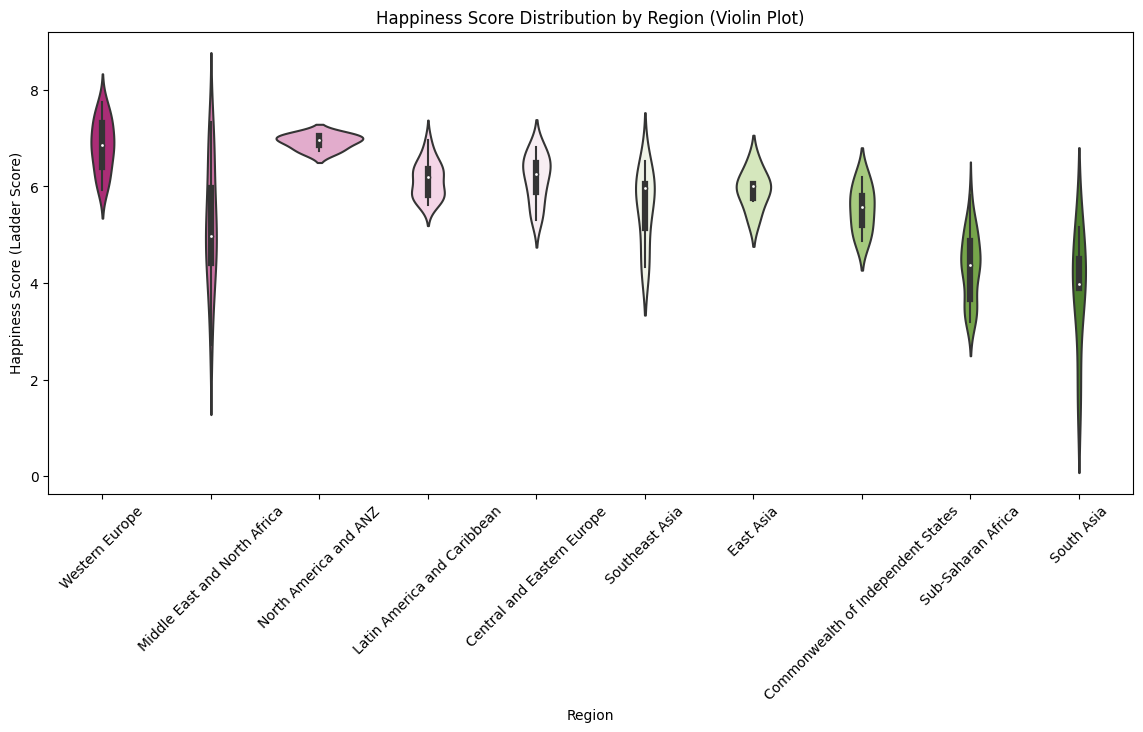

In [206]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df2, x="Regional indicator", y="Ladder score", palette="PiYG")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Happiness Score (Ladder Score)")
plt.title("Happiness Score Distribution by Region (Violin Plot)")
plt.show()


### ama sadece pie plot'a deƒüil Daƒüƒ±lƒ±mlarƒ±na da baktƒ±ƒüƒ±mƒ±zda b√∂lgelere g√∂re olu≈üan orantƒ±sƒ±zlƒ±klarƒ± da g√∂rebiliyoruz. bazƒ± b√∂lgeler √ßoƒüunlukla y√ºksek mutluluk seviyesine sahipken, bazƒ± b√∂lgelerin ise i√ßinde √ßok d√º≈ü√ºk mutluluk seviyelerine sahip √ºlkeler de barƒ±ndƒ±rdƒ±ƒüƒ±nƒ± g√∂rebiliyoruz

<a id = "7"></a><br>
# Life Ladder Comparison by Contries and Years

In [212]:
fig = px.choropleth(df.sort_values('year'), 
                    locations = 'Country name',
                    color ='Life Ladder',
                    locationmode = 'country names',
                    animation_frame = 'year')
fig.update_layout(title = 'Life Ladder Comparison by Contries' )

In [184]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_happiness, x="year", y="Life Ladder", marker="o", linestyle="-", color="crimson")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score (Life Ladder)")
plt.title("Happiness Score Change Over Years (Line Plot)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



### ilk yƒ±llardaki veriler yanƒ±ltƒ±cƒ± olablir. ilk yƒ±llarda √ßok fazla √ºlkenin verisi yok elimizde

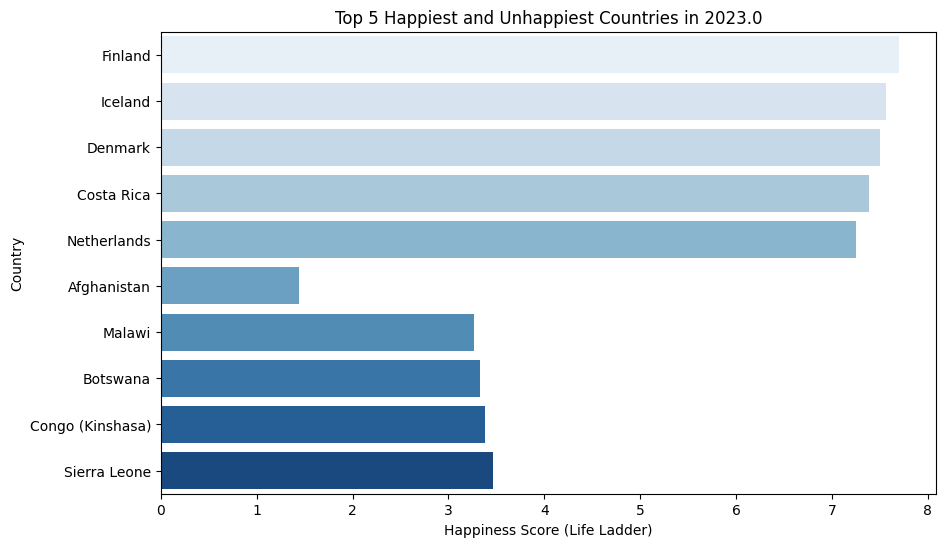

In [183]:
latest_year = df["year"].max()

df_latest = df[df["year"] == latest_year]

top_5_happy = df_latest.nlargest(5, "Life Ladder")
bottom_5_happy = df_latest.nsmallest(5, "Life Ladder")

happiness_df = pd.concat([top_5_happy, bottom_5_happy])

if happiness_df.empty:
    print(f"No valid data found for the latest year ({latest_year}).")
else:
    # Bar Plot √ßizme
    plt.figure(figsize=(10,6))
    sns.barplot(data=happiness_df, x="Life Ladder", y="Country name", palette="Blues")
    plt.xlabel("Happiness Score (Life Ladder)")
    plt.ylabel("Country")
    plt.title(f"Top 5 Happiest and Unhappiest Countries in {latest_year}")
    plt.show()
